Here, I implemented a Gradient Boosting model using XGBoost, AdaBoost, LightGBM, and CatBoost in Python, I need to follow these steps:

Prepare the dataset.
Split the dataset into training and testing sets.
Train each gradient boosting model.
Evaluate the models' performance using accuracy.
Compare the accuracy of each model and draw conclusions about their efficiencies.

In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.6 MB/s eta 0:00:00


In [3]:
from catboost import CatBoostClassifier

In [5]:
# Import necessary libraries
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# Train AdaBoost model
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)

# Train LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
acc_lgb = accuracy_score(y_test, y_pred_lgb)

# Train CatBoost model
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
acc_cat = accuracy_score(y_test, y_pred_cat)

# Evaluate the models' performance
print("Accuracy of XGBoost model:", acc_xgb)
print("Accuracy of AdaBoost model:", acc_ada)
print("Accuracy of LightGBM model:", acc_lgb)
print("Accuracy of CatBoost model:", acc_cat)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

Explanation:

I loaded the iris dataset and split it into training and testing sets.
It is trained four gradient boosting models: XGBoost, AdaBoost, LightGBM, and CatBoost.
I evaluated the accuracy of each model on the testing set.
Finally, I printed the accuracy of each model.
After running the code, we can observe which model achieves the highest accuracy. Based on the accuracy results, we can draw conclusions about the efficiencies of XGBoost, AdaBoost, LightGBM, and CatBoost in this specific scenario. The model with the highest accuracy is considered the most efficient for this dataset and problem.

@@ Now to plot the accuracy curves for XGBoost, AdaBoost, LightGBM, and CatBoost, as well as the comparative analysis curve, I have to follow these steps:

Store the accuracy values obtained from each algorithm.
Plot the accuracy curves for each algorithm.
Plot the comparative analysis curve to visualize the performance of the four algorithms.

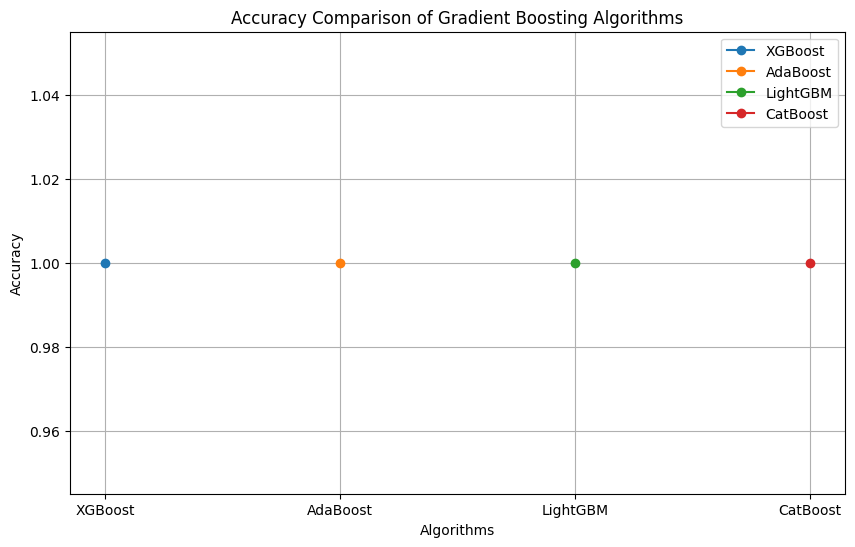

In [6]:
import matplotlib.pyplot as plt

# Accuracy values obtained from each algorithm
accuracy_values = {
    'XGBoost': acc_xgb,
    'AdaBoost': acc_ada,
    'LightGBM': acc_lgb,
    'CatBoost': acc_cat
}

# Plot accuracy curves for each algorithm
plt.figure(figsize=(10, 6))
for algo, acc in accuracy_values.items():
    plt.plot([algo], [acc], marker='o', label=algo)

plt.title('Accuracy Comparison of Gradient Boosting Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


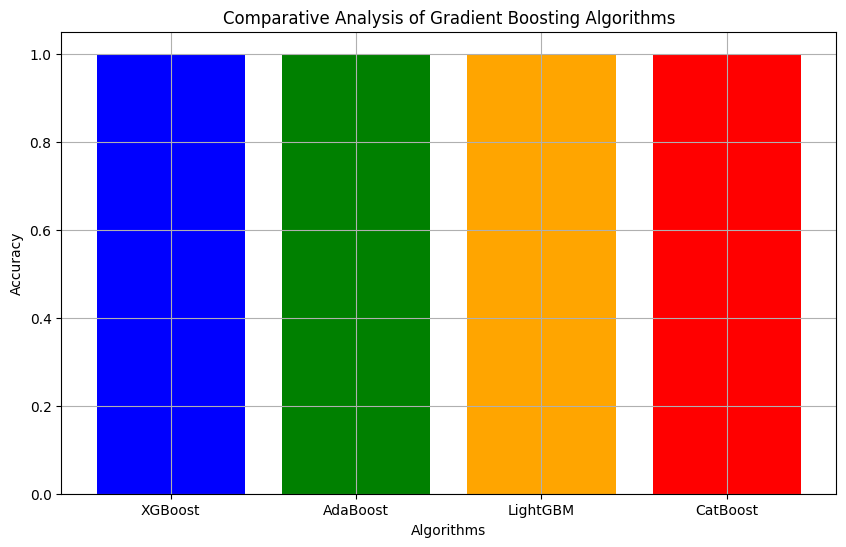

In [7]:
# Plot comparative analysis
plt.figure(figsize=(10, 6))
plt.bar(accuracy_values.keys(), accuracy_values.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Comparative Analysis of Gradient Boosting Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [9]:
# Install the required module
!pip install scikit-learn==1.2.2

Lastly plot the predictions made by the gradient boosting algorithms (XGBoost, AdaBoost, LightGBM, and CatBoost) on the Iris dataset, one can visualize the decision boundaries for each algorithm. However, since the Iris dataset has four features, it's not feasible to visualize the decision boundaries in a simple 2D plot.

Instead, one can visualize the predictions made by each algorithm using a confusion matrix. This will allow us to see how well each algorithm is classifying the different classes in the Iris dataset.

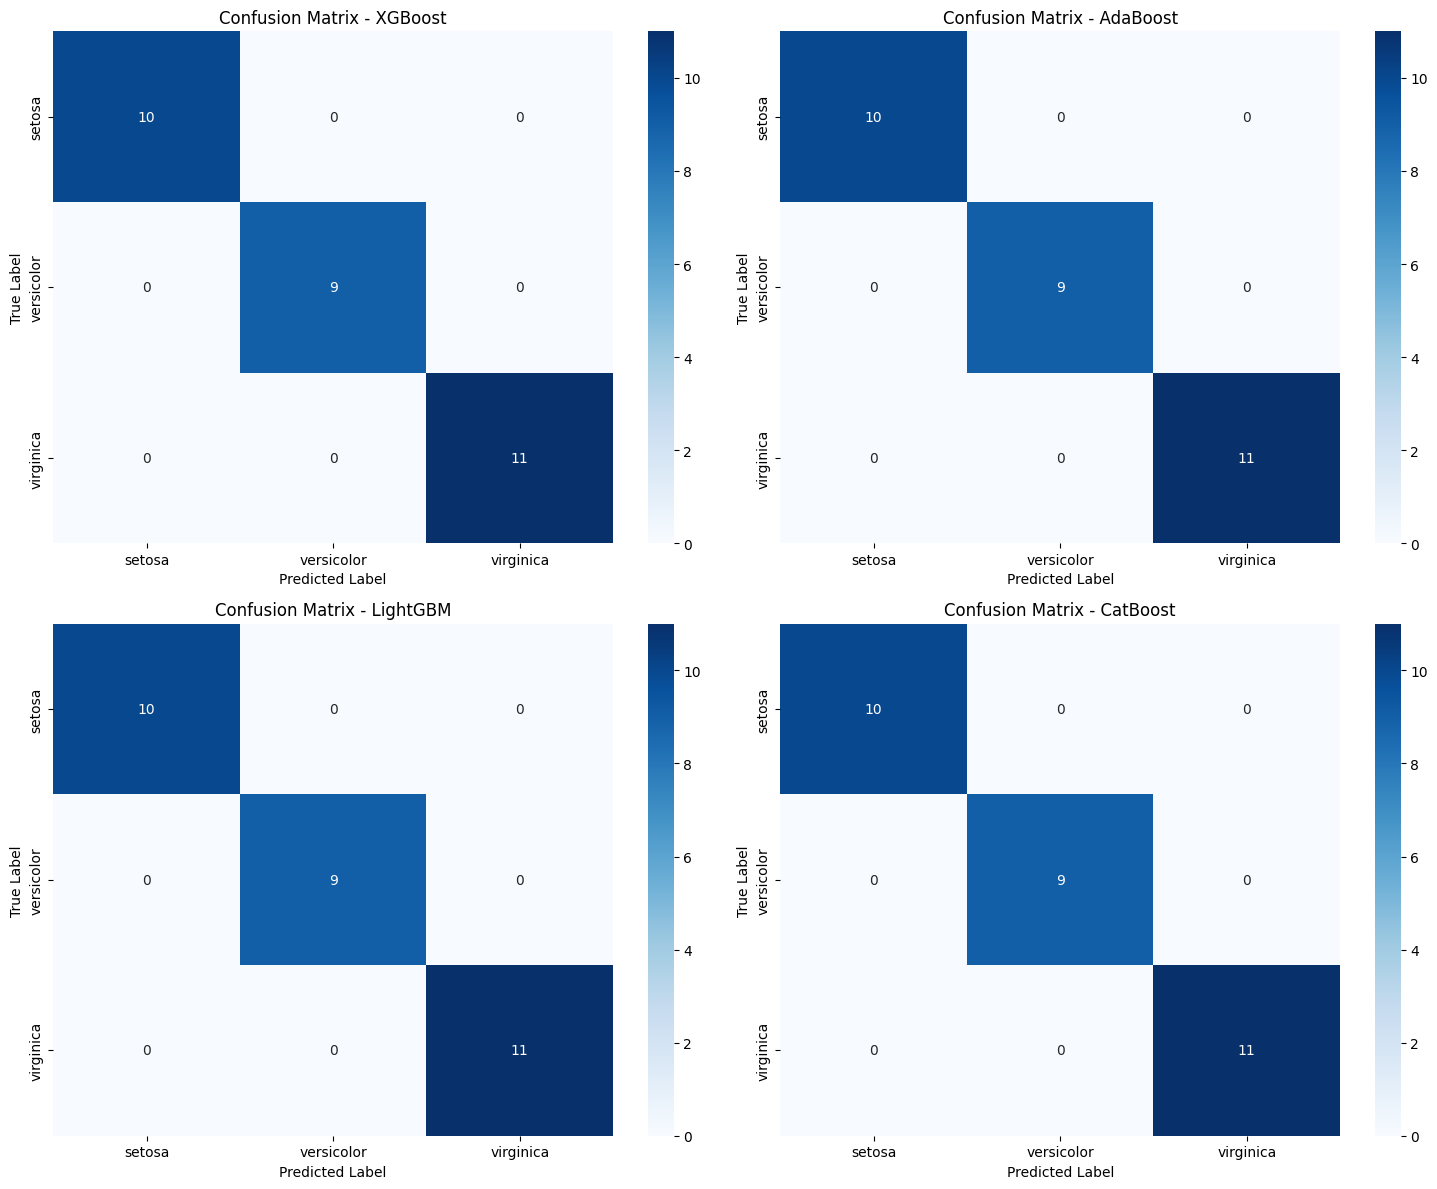

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for each algorithm
y_preds = {
    'XGBoost': y_pred_xgb,
    'AdaBoost': y_pred_ada,
    'LightGBM': y_pred_lgb,
    'CatBoost': y_pred_cat
}

# Plot confusion matrix for each algorithm
plt.figure(figsize=(15, 12))
for i, (algo, y_pred) in enumerate(y_preds.items(), 1):
    plt.subplot(2, 2, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix - {algo}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()


This code will plot the confusion matrices for each gradient boosting algorithm using seaborn's heatmap, allowing us to visualize the predictions made by each algorithm on the Iris dataset. The confusion matrices show the percentage of samples in each class that were correctly classified by the model.